Link Video : https://binusianorg-my.sharepoint.com/personal/arvio_anandi_binus_ac_id/_layouts/15/guestaccess.aspx?docid=0fbc04d557fd940398d75454e67128d44&authkey=AeR-HNxMpK-NJxI_OsRW1tw&e=0HdiGr

# 1.a.

## Data Preprocessing & Exploration

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error as mape
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanAbsolutePercentageError
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from datetime import datetime
from keras.callbacks import EarlyStopping
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Baca dataset dari file CSV
df = pd.read_csv('C://Users/User/Downloads/UAS_DL/AMD.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
target = df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [8]:
target.index = pd.to_datetime(target.Date)

In [9]:
target

,Date,Close
Date,,
1980-03-17,1980-03-17,3.145833
1980-03-18,1980-03-18,3.031250
1980-03-19,1980-03-19,3.041667
1980-03-20,1980-03-20,3.010417
1980-03-21,1980-03-21,2.916667
...,...,...
2020-03-26,2020-03-26,47.500000
2020-03-27,2020-03-27,46.580002
2020-03-30,2020-03-30,47.860001


<AxesSubplot:xlabel='Date'>

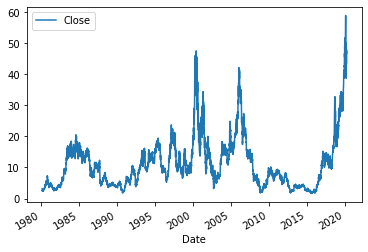

In [10]:
target.plot()

In [11]:
# Transform the data using Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(target['Close'])

target['Close'] = transformed_data

# Print the transformed data and lambda value
print("Transformed Data:")
print(transformed_data)
print("Lambda Value:", lambda_value)

Transformed Data:
[1.1712063  1.13249088 1.13606819 ... 4.16466299 4.10570132 4.05857396]
Lambda Value: 0.0377112539235464


To handle the outliers in the time series data, we use the boxcox transformation method to normalize the values of the dataset using the lambda value of 0.037.

<AxesSubplot:xlabel='Date'>

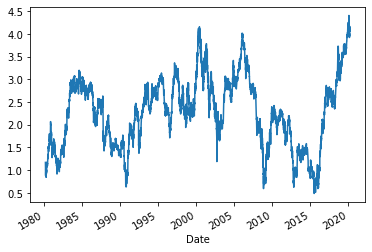

In [12]:
target["Close"].plot()

Using the boxplot to check for outliers. The outliers were handled using the boxcox transformation method.

In [13]:
# Convert 'Date' column to datetime type
target['Date'] = pd.to_datetime(target['Date'])

# Get the start of the week for each date
target['WeekStart'] = target['Date'] - pd.to_timedelta(target['Date'].dt.dayofweek, unit='d')

# Group by week and count the number of unique dates in each week
week_counts = target.groupby('WeekStart')['Date'].nunique()

# Find the weeks with 5 unique dates (complete weeks)
complete_weeks = week_counts[week_counts == 5].index

# Filter the DataFrame to keep only the complete weeks
cleaned_df = target[target['WeekStart'].isin(complete_weeks)]

# Reset the index if desired
cleaned_df.reset_index(drop=True, inplace=True)

To handle missing dates in the dataset, we create a new column called WeekStart which is the replication of Date column, then we find the week with 5 unique date dates (complete weeks), and lastly we filter the dataframe to keep only the complete weeks and reset the index to get a new dataframe with only complete weekdays.

In [14]:
# Print the resulting DataFrame
cleaned_df.head(30)

,Date,Close,WeekStart
0,1980-03-17,1.171206,1980-03-17
1,1980-03-18,1.132491,1980-03-17
2,1980-03-19,1.136068,1980-03-17
3,1980-03-20,1.125301,1980-03-17
4,1980-03-21,1.092341,1980-03-17
5,1980-03-24,0.999195,1980-03-24
6,1980-03-25,0.974595,1980-03-24
7,1980-03-26,0.910521,1980-03-24
8,1980-03-27,0.879260,1980-03-24
9,1980-03-28,0.949421,1980-03-24


In [15]:
target = cleaned_df.drop(['WeekStart'],axis=1)

Filter the dataset from unused column WeekStart.

In [16]:
target.index = pd.to_datetime(target.Date)
target = target.drop(['Date'],axis=1)
target.head(20)

,Close
Date,
1980-03-17,1.171206
1980-03-18,1.132491
1980-03-19,1.136068
1980-03-20,1.125301
1980-03-21,1.092341
1980-03-24,0.999195
1980-03-25,0.974595
1980-03-26,0.910521
1980-03-27,0.879260


## Stationarity

In [17]:
sts.adfuller(target)

(-2.503185792772723,
 0.11470110998151595,
 9,
 8710,
 {'1%': -3.431101002096113,
  '5%': -2.861871892839921,
  '10%': -2.566946661596196},
 -29511.08136764168)

By looking at the p-value, there is very low chance of 0.11 that the data comes from a non-stationary process, therefore the dataset comes from a stationary process. Hence, detrending methods such as differencing or fitting a regression model and subtracting the fitted values are not needed for this dataset.

## Window Partition

In [18]:
def window_partition(df,window_size=5):
    df_np = df.to_numpy()
    X = []
    y = []
    for i in range(0,len(df_np)-window_size,5):
        row = [[a] for a in df_np[i:i+5]]
        col = df_np[i+5]
        X.append(row)
        y.append(col)
    return np.array(X), np.array(y)

We partition the data by iterating through the dataset with timestep of 5, where in each iteration, we assign the first 5 values to the row variable, and the next value to the col variable, then we append these values to an empty list of X and y. After the iterations, we return the X and y values as numpy. 

In [19]:
WINDOW_SIZE = 5
X, y = window_partition(target, WINDOW_SIZE)
X.shape, y.shape

((1743, 5, 1, 1), (1743, 1))

We apply the function to the dataset with window size of 5, and we print out the shape resulting the shape shown above.

In [20]:
# Reshape 'x' to (1743, 5)
X = X.reshape(1743, 5)

In [22]:
X.shape

(1743, 5)

We reshape the data to the format of (None,5) to fit the model input shape. The dataset is fit for data splitting.

## Data Splitting (80% Train, 10% Test, 10% Val)

In [23]:
train_size = int(len(X)*0.8)
val_size = int(len(X)*0.1)

X_train, y_train = X[:train_size],y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:],y[train_size+val_size:]
X_train.shape, y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1394, 5), (1394, 1), (174, 5), (174, 1), (175, 5), (175, 1))

The dataset is split into 80% training data, 10% testing data, and 10% validation data.

Short summary for preprocessing and exploration part : Overall, the dataset requires some preprocessing and exploration to be done such as handling outliers, handling missing dates in the dataset, window partitioning, and data splitting. But aside from that, the data does not suffer from stationarity nor missing values and is ready for model training. Therefore, we can proceed to next steps.

# 1.b.

## 1st Architecture

In [84]:
model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(5,1)))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [85]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
30/44 [===================>..........] - ETA: 0s - loss: 4.9295 - root_mean_squared_error: 2.2202 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 3s 39ms/step - loss: 4.7857 - root_mean_squared_error: 2.1876 - val_loss: 1.2083 - val_root_mean_squared_error: 1.0992
Epoch 2/10
25/44 [================>.............] - ETA: 0s - loss: 4.1518 - root_mean_squared_error: 2.0376

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 33ms/step - loss: 3.9682 - root_mean_squared_error: 1.9920 - val_loss: 0.9829 - val_root_mean_squared_error: 0.9914
Epoch 3/10
23/44 [==============>...............] - ETA: 0s - loss: 3.2970 - root_mean_squared_error: 1.8158

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 32ms/step - loss: 3.0569 - root_mean_squared_error: 1.7484 - val_loss: 0.7422 - val_root_mean_squared_error: 0.8615
Epoch 4/10
22/44 [==============>...............] - ETA: 0s - loss: 2.3094 - root_mean_squared_error: 1.5197

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 2s 36ms/step - loss: 2.0196 - root_mean_squared_error: 1.4211 - val_loss: 0.4754 - val_root_mean_squared_error: 0.6895
Epoch 5/10
22/44 [==============>...............] - ETA: 0s - loss: 1.1678 - root_mean_squared_error: 1.0807

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 29ms/step - loss: 0.9287 - root_mean_squared_error: 0.9637 - val_loss: 0.2292 - val_root_mean_squared_error: 0.4788
Epoch 6/10
26/44 [================>.............] - ETA: 0s - loss: 0.2904 - root_mean_squared_error: 0.5388

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.2249 - root_mean_squared_error: 0.4743 - val_loss: 0.0952 - val_root_mean_squared_error: 0.3086
Epoch 7/10
22/44 [==============>...............] - ETA: 0s - loss: 0.0998 - root_mean_squared_error: 0.3159

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 31ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2743
Epoch 8/10
24/44 [===============>..............] - ETA: 0s - loss: 0.0943 - root_mean_squared_error: 0.3071

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.0921 - root_mean_squared_error: 0.3034 - val_loss: 0.0713 - val_root_mean_squared_error: 0.2671
Epoch 9/10
29/44 [==================>...........] - ETA: 0s - loss: 0.0922 - root_mean_squared_error: 0.3037

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 30ms/step - loss: 0.0870 - root_mean_squared_error: 0.2949 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 10/10
27/44 [=================>............] - ETA: 0s - loss: 0.0825 - root_mean_squared_error: 0.2872

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


44/44 [==============================] - 1s 33ms/step - loss: 0.0820 - root_mean_squared_error: 0.2864 - val_loss: 0.0611 - val_root_mean_squared_error: 0.2472


# 1.c. 

## 2nd Architecture

In [244]:
model2 = Sequential()
model2.add(Input(shape=(5, 1)))
model2.add(Conv1D(filters=32, kernel_size=1, activation="relu"))
model2.add(Conv1D(filters=32, kernel_size=2, activation="relu"))
model2.add(LSTM(units=50,return_sequences=True))
model2.add(LSTM(units=50,return_sequences=True))
model2.add(Flatten())
model2.add(Dense(32))
model2.add(Dense(16))
model2.add(Dense(8))
model2.add(Dense(4))
model2.add(Dense(1))
model2.add(ReLU())

model2.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_69 (Conv1D)          (None, 5, 32)             64        
                                                                 
 conv1d_70 (Conv1D)          (None, 4, 32)             2080      
                                                                 
 lstm_54 (LSTM)              (None, 4, 50)             16600     
                                                                 
 lstm_55 (LSTM)              (None, 4, 50)             20200     
                                                                 
 flatten_11 (Flatten)        (None, 200)               0         
                                                                 
 dense_117 (Dense)           (None, 32)                6432      
                                                                 
 dense_118 (Dense)           (None, 16)              

In [252]:
model2.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.003), metrics=[RootMeanSquaredError()])
model2.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
44/44 [==============================] - 16s 41ms/step - loss: 6.9360 - root_mean_squared_error: 0.2487 - val_loss: 7.3413 - val_root_mean_squared_error: 0.0949
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 3.4545 - root_mean_squared_error: 0.0978 - val_loss: 5.1602 - val_root_mean_squared_error: 0.0708
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 3.2728 - root_mean_squared_error: 0.0927 - val_loss: 4.8839 - val_root_mean_squared_error: 0.0701
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 3.5584 - root_mean_squared_error: 0.1041 - val_loss: 4.8312 - val_root_mean_squared_error: 0.0682
Epoch 5/10
44/44 [==============================] - 0s 5ms/step - loss: 3.4371 - root_mean_squared_error: 0.0974 - val_loss: 7.5596 - val_root_mean_squared_error: 0.0972
Epoch 6/10
44/44 [==============================] - 0s 7ms/step - loss: 3.5722 - root_mean_squared_error: 0.1010 - val_loss: 4.6523 - val_root_mean_

In the second LSTM architecture, we have an input layer that expects sequences of length 5, with each sequence having a single feature. This sets the foundation for processing our sequential data.

Next, we employ two convolutional layers. The first layer uses a kernel size of 1, allowing it to focus on individual elements within the sequence. The second layer, with a kernel size of 2, can capture patterns across neighboring elements. Both convolutional layers employ 32 filters to extract relevant features.

Moving forward, we introduce two LSTM layers. These layers have 50 units each, enabling them to learn and remember patterns across the sequences. By setting return_sequences=True, we ensure that the LSTM layers retain and output the full sequence of information.

To prepare the output for further processing, we utilize a flatten layer, which transforms the multidimensional output from the LSTM layers into a 1D vector.

The subsequent part of our architecture involves several dense layers. Each dense layer connects every neuron to those in the previous layer, gradually reducing the dimensionality of the data. We start with a dense layer of size 32, followed by layers of size 16, 8, and 4, respectively. Finally, we end with a dense layer of size 1, which yields the final output of our model.

To introduce non-linearity and enhance the model's ability to capture complex patterns, we employ the ReLU activation function throughout the network. ReLU allows the model to make nonlinear transformations on the data and learn intricate relationships.

In summary, this architecture combines convolutional and recurrent layers, making it ideal for processing sequential data such as time series or natural language. By utilizing convolutional layers, we extract local patterns, while LSTM layers enable the model to learn and remember long-term dependencies. The dense layers progressively reduce the dimensionality, leading to the final output.

# 1.d.

## Evaluation

In [227]:
model1_predictions = model1.predict(X_test)
model2_predictions = model2.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [254]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

model1_rmse = np.sqrt(mean_squared_error(model1_predictions,y_test))
model2_rmse = np.sqrt(mean_squared_error(model2_predictions,y_test))
model1_mae = mean_absolute_error(model1_predictions,y_test)
model2_mae = mean_absolute_error(model2_predictions,y_test)
model1_mape=mape(model1_predictions,y_test)
model2_mape=mape(model2_predictions,y_test)

In [256]:
# Create a dictionary with the evaluation results
evaluation_data = {
    'Model': ['Model 1', 'Model 2'],
    'RMSE': [model1_rmse, model2_rmse],
    'MAE': [model1_mae, model2_mae],
    'MAPE': [model1_mape, model2_mape]
}

# Create a DataFrame from the evaluation data
evaluation = pd.DataFrame(evaluation_data)

# Set the 'Model' column as the index
evaluation.set_index('Model', inplace=True)

# Round the values to 4 decimal places
evaluation = evaluation.round(4)

# Print the evaluation DataFrame
print(evaluation)


           RMSE     MAE    MAPE
Model                          
Model 1  0.2472  0.2324  0.2454
Model 2  0.0792  0.0652  0.0583


RMSE (Root Mean Square Error) measures the prediction accuracy of the model by calculating the square root of the average of the squared differences between the predicted values and the actual values. The lower the RMSE value, the smaller the average deviation or error between the predictions and the actual values. In the context of stock prices, a low RMSE value indicates that the model's predictions tend to closely approximate the actual values accurately.

MAE (Mean Absolute Error) measures the average absolute deviation between the predicted values and the actual values. MAE disregards the direction (positive or negative) of the prediction errors. The lower the MAE value, the closer the predictions are to the actual values overall. In the context of stock prices, a low MAE value indicates that the model generally has the ability to predict prices with low levels of error.

MAPE (Mean Absolute Percentage Error) measures the average percentage of absolute errors relative to the actual values. MAPE provides an indication of how large the prediction errors are in proportion to the actual values. The lower the MAPE value, the smaller the percentage of prediction errors relative to the actual values. In the context of stock prices, a low MAPE value indicates that the model has a low level of error in predicting percentage changes in stock prices.

Overall, the RMSE, MAE, and MAPE values of the second model are lower than those of the first model, indicating that the second model has better ability to capture patterns and trends in the data and minimize prediction errors compared to the first model. Therefore, the model that William S. Cleveland would use to create an application to help the company predict stock prices would be the second LSTM model.